In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

mnist = keras.datasets.mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training Data : {}, {}".format(train_images.shape, train_labels.shape))
print("Test Data : {}, {}".format(test_images.shape, test_labels.shape))

Training Data : (60000, 28, 28), (60000,)
Test Data : (10000, 28, 28), (10000,)


In [4]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are [0 1 2 3 4 5 6 7 8 9]


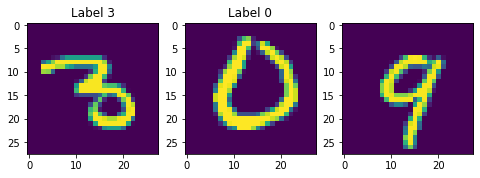

In [5]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt.imshow(train_images[30])
plt.title("Label {}".format(train_labels[30]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label {}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12])

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

In [7]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]


print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)


In [8]:
# Reshape the data to two dimensinal array
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [9]:
# Encode Labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [11]:
#Building a Sequential Feed Forward Network in Keras
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

Epoch 1/20
50/50 [==============================] - 3s 53ms/step - loss: 0.2440 - accuracy: 0.9291 - val_loss: 0.1839 - val_accuracy: 0.9501
Epoch 2/20
50/50 [==============================] - 2s 38ms/step - loss: 0.1693 - accuracy: 0.9519 - val_loss: 0.1458 - val_accuracy: 0.9592
Epoch 3/20
50/50 [==============================] - 2s 42ms/step - loss: 0.1316 - accuracy: 0.9621 - val_loss: 0.1211 - val_accuracy: 0.9666
Epoch 4/20
50/50 [==============================] - 2s 45ms/step - loss: 0.1033 - accuracy: 0.9703 - val_loss: 0.1086 - val_accuracy: 0.9679
Epoch 5/20
50/50 [==============================] - 2s 42ms/step - loss: 0.0853 - accuracy: 0.9756 - val_loss: 0.0965 - val_accuracy: 0.9710
Epoch 6/20
50/50 [==============================] - 2s 38ms/step - loss: 0.0720 - accuracy: 0.9798 - val_loss: 0.0930 - val_accuracy: 0.9730
Epoch 7/20
50/50 [==============================] - 2s 41ms/step - loss: 0.0581 - accuracy: 0.9837 - val_loss: 0.0863 - val_accuracy: 0.9745
Epoch 8/20
50

In [14]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
test_loss, test_accuracy = model.evaluate(test_images, y_test)

print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9794
Test loss: 0.07067396491765976
Test accuracy: 0.9793999791145325


Text(0.5, 1.0, 'Loss Curves - Before Reularization')

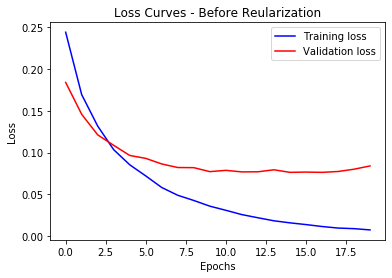

In [18]:
# check for overfitting
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - Before Reularization')

In [20]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

In [21]:
reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

Epoch 1/20
50/50 [==============================] - 2s 46ms/step - loss: 0.9735 - accuracy: 0.6946 - val_loss: 0.2961 - val_accuracy: 0.9145
Epoch 2/20
50/50 [==============================] - 3s 51ms/step - loss: 0.3847 - accuracy: 0.8849 - val_loss: 0.2086 - val_accuracy: 0.9401
Epoch 3/20
50/50 [==============================] - 2s 43ms/step - loss: 0.2872 - accuracy: 0.9173 - val_loss: 0.1646 - val_accuracy: 0.9529
Epoch 4/20
50/50 [==============================] - 2s 41ms/step - loss: 0.2341 - accuracy: 0.9324 - val_loss: 0.1395 - val_accuracy: 0.9590
Epoch 5/20
50/50 [==============================] - 3s 54ms/step - loss: 0.2024 - accuracy: 0.9419 - val_loss: 0.1217 - val_accuracy: 0.9631
Epoch 6/20
50/50 [==============================] - 2s 45ms/step - loss: 0.1768 - accuracy: 0.9479 - val_loss: 0.1126 - val_accuracy: 0.9659
Epoch 7/20
50/50 [==============================] - 2s 42ms/step - loss: 0.1617 - accuracy: 0.9513 - val_loss: 0.1047 - val_accuracy: 0.9685
Epoch 8/20
50

In [22]:
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)

print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9801
Test loss: 0.07143773138523102
Test accuracy: 0.9800999760627747


Text(0.5, 1.0, 'Loss Curves - After Reularization')

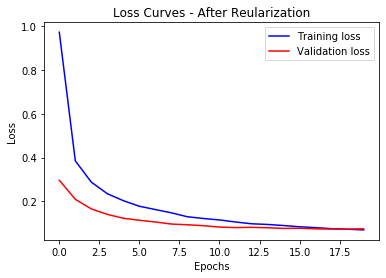

In [23]:
# check for overfitting
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - After Reularization')

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
Conv2D?